University of Helsinki, Master's Programme in Mathematics and Statistics  
MAST32001 Computational Statistics, Autumn 2022  
Luigi Acerbi  
Based on notebook by Antti Honkela
# Lecture 2: Random number generators and simulating random numbers

Background reading: please see Chapter 2 of the "Course notes" available in Moodle.

## Important best practices

**Always set and save your random seed to make your experiments repeatable**

### 1. Simulating discrete distributions

Many statistical applications depend on generating random numbers with a specific distribution. We will return to the topic many times with increasingly complex methods, but before that we start simple.

1. Write a program to simulate a fair 6-sided die starting from a Uniform(0,1) random number generator (RNG) such as those provided by `numpy.random`. 
2. How many throws do you have to simulate to be reasonably sure (let's say ~95% probability) to get at least 10 6s? Write a computer program simulation to compute this approximately.
3. Write a program to simulate a biased coin with a specified bias `0 <= bias <= 1` using a Uniform(0,1) RNG, where `bias` is the probability of success (so `bias = 0.5` is an unbiased coin).
4. Simulate a coin flip competition between a person using a fair coin and a person using a biased coin where the competition consists of 100 coin flips. How large a bias do you need for the biased coin to lead to 95% probability of the person using the biased coin to obtain more heads than the person using the fair coin? What if you want 99% probability?

*Note*: In Python, `numpy.random` draws uniformly in the range $[0, 1)$ (i.e., 0 is included and 1 is excluded).

In [ ]:
# Some hints for plotting.
# In order to plot simple functions with matplotlib and NumPy you can use
# Initialise plotting in the IPython/Jupyter notebook:
%matplotlib inline
import numpy as np  # import numpy, alias as np to save typying (common convention)
import matplotlib.pyplot as plt   # import matplotlib, alias as plt to save typing (common convention)
import numpy as np
import numpy.random as npr


40.85

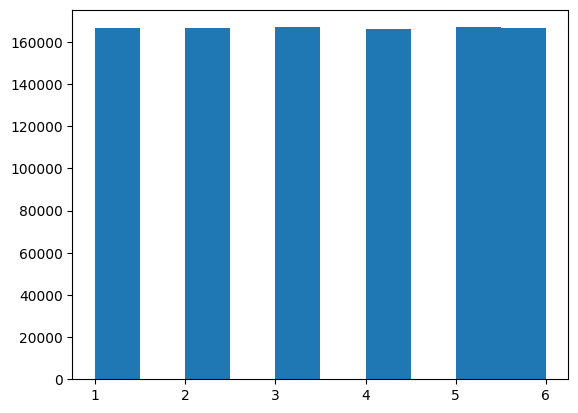

In [29]:

# Did I mention to always set and save your random seed to make your experiments repeatable?
rng = npr.default_rng(41)

# Note that in older versions of NumPy, you would set the global random seed as follows, and it can still be done
# npr.seed(41)

#1
def simulate_die(n_draws: int) -> np.ndarray:
    return np.ceil(rng.random(size=(n_draws)) * 6).astype(int)
draws = simulate_die(1000_000)
plt.hist(draws)

#2
def at_least_10_sixes() -> int:
    sixes = 0
    throws = 0
    while(True):
        if sixes == 10:
            return 0.95 * throws
        throw = simulate_die(1)
        throws +=1
        if throw == 6:
            sixes +=1

at_least_10_sixes()
#3

#4

### 2. Simulating continuous distributions with transformations

1. Derive and implement a method for sampling from the [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) $\mathrm{Exponential}(\lambda)$ using inverse cumulative density transformation (see course notes!).
2. Test your method by drawing 1000 samples with the values $\lambda = 0.1, 1, 10$. Compute the mean and standard deviation of the samples for each case. Plot a histogram of the samples together with the density and check if they match.
3. Implement a method for sampling from the normal distribution using Box-Muller transformation (See Sec. 2.2.1 of the course notes)
4. Test your method and plot the histogram of the samples together with the density and check if they match.
5. Check what is the largest value of a normally distributed random number that can be generated like this?

*Hints*: An example of how to use plotting is included below. You can use `plt.hist(..., density=True)` to plot a normalised histogram. Try to find a suitable number of bins to make the plot meaningful. You can view the documentation for the function `plt.hist` using the command: `? plt.hist`

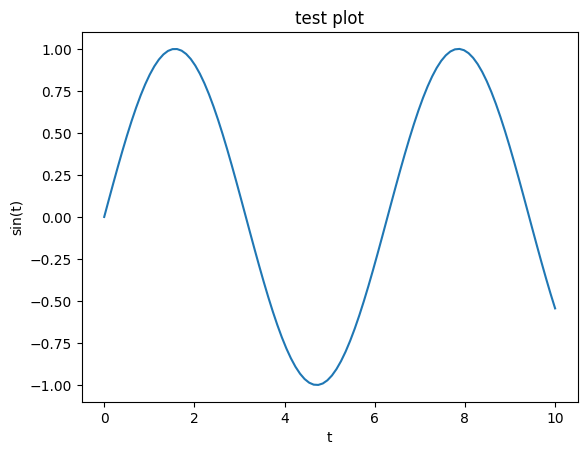

In [2]:

t = np.linspace(0, 10, 100)
plt.plot(t, np.sin(t))
plt.xlabel('t')
plt.ylabel('sin(t)')
plt.title('test plot')
plt.show()

### 3. Basic rejection sampling

1. Design and implement rejection sampling for sampling from the density
$$ p(x) = 4x^3, \quad x \in [0, 1] $$
using the uniform distribution on the interval $[0,1]$ as the proposal.
2. Which value of $M$ can you use? How does the choice of $M$ affect the method?
3. Test your method and plot the generated samples together with the density and check that they match.

*Note*: Technically the uniform distribution in Python is defined for $x \in [0, 1)$, but we can typically ignore the fact that 1 is not included in the range. The probability of drawing any *specific* number in the range is so small - roughly equal to the precision of the number type, here `double` - that removing one number has no practical consequences. However, still be careful that 0 *is* included.

### 4. Mersenne Twister

The most popular random number generator is the Mersenne Twister, which is also used by Python (`random.random()`). It can be used to generate uniformly distributed integers in a given interval, which can be transformed to floating point numbers in a given interval.

1. Find the documentation of the Python random number generators.
2. Try `random.random()` and `numpy.random.random()` generators while setting the seed to a known value.
3. Test that you can recreate the same sequence of numbers by setting the seed to the same value.
4. Guess how many different random numbers you need to sample until you start seeing the same number repeated. Test your guess.  
  - *Hint*: If you are completely unsure about the guess, look up the "[birthday problem](https://en.wikipedia.org/wiki/Birthday_problem)". Think how many different numbers you can represent *uniformly* with double precision.
  - When testing with a large number of random numbers, you may have trouble such as running out of memory etc. It is advisable to increase the number of random samples you test relatively slowly (say by a factor of 2 at a time) to avoid starting runs that completely kill your computer for a long time.

### *5. More advanced random number generators (optional)

The PCG family of RNGs claims to be superior to standard approaches such as Mersenne Twister, see http://www.pcg-random.org/

1. Read the description of the PCG generator and its features.
2. Find an implementation of the PCG generator and test it as above (*Hint*: recent versions of NumPy use the PCG generator as their default RNG stream).

### Bonus extra: BBC In Our Time podcast "Random and Pseudorandom"

http://www.bbc.co.uk/programmes/b00x9xjb